In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [4]:
df=pd.read_csv("/home/cristian/roboBohr.csv")

In [ ]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


In [ ]:
df=df.rename(columns={"Unnamed: 0":"indice_mole"})

In [ ]:
df.head()

,indice_mole,0,1,2,3,4,5,6,7,8,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


# Coulomb Matrix
las primeras 1275 colmnas representan la Coulomb Matrix, que  es una descripcion global simple que imita la interacción electrostática entre núcleos.
Los valores propios de la matriz de Coulomb (CME) son representaciones 3D globales de la estructura molecular, que se han utilizado previamente para 
predecir energías de atomización, priorizar búsquedas de geometría e interpretar espectros de rotación.

# Pubchem Id 
es un id que representa la molecula en una base de datos: https://pubchem.ncbi.nlm.nih.gov

# Eat 
Energia de atomizacion 


In [ ]:
Eat = pd.DataFrame(df['Eat'].value_counts().sort_values(ascending=False))
Eat

,Eat
-5.343711,3
-9.672131,3
-11.606043,2
-8.606721,2
-10.116485,2
...,...
-11.921507,1
-12.682452,1
-9.661799,1
-11.897464,1


In [ ]:
#Borrar lo que no me sirve para el modelo

df=df.drop(["indice_mole", "pubchem_id"], axis=1)



In [ ]:
df.describe() #No tiene ningn tipo de normalizació

,0,1,2,3,4,5,6,7,8,9,...,1266,1267,1268,1269,1270,1271,1272,1273,1274,Eat
count,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,...,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000
mean,115.715266,22.445723,20.474191,18.529573,17.169350,15.816888,15.133152,14.471534,13.960759,13.464842,...,0.000135,0.000134,0.000133,0.003879,0.000131,0.000129,0.002155,0.000127,0.001201,-11.178969
std,113.198503,8.659586,7.670481,6.485777,5.512560,4.179691,3.885091,3.503075,3.357136,3.140732,...,0.002748,0.002728,0.002705,0.043869,0.002676,0.002633,0.032755,0.002594,0.024472,3.659133
min,36.858105,2.906146,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-23.245373
25%,73.516695,17.969345,16.228071,15.165862,13.744092,13.653146,13.637784,12.759519,12.587359,12.489127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.475805
50%,73.516695,20.662511,18.631287,17.690729,16.020040,15.156646,13.848274,13.659233,13.652832,13.648992,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.835211
75%,73.516695,21.132432,20.739496,18.712895,18.297501,17.639688,16.154918,15.499474,14.900585,13.801184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.623903
max,388.023441,73.563510,66.269180,66.268891,66.268756,66.268196,66.264158,66.258487,66.258177,60.365756,...,0.062496,0.062225,0.061999,0.500000,0.061534,0.059760,0.500000,0.057834,0.500000,-0.789513


/home/cristian/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


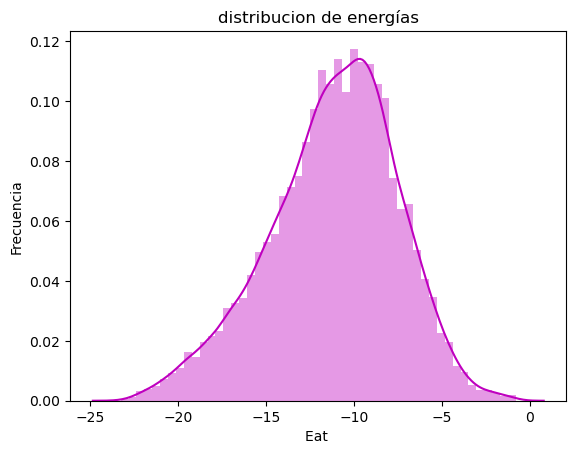

In [ ]:
sns.distplot(df['Eat'],  color="m")
plt.xlabel('Eat ')
plt.ylabel('Frecuencia')
plt.title('distribucion de energías');
plt.show()

De lo anterior se puede ver como en la muestra de datos, el valor medio de energia de atomizacion es de al rededor de -10. Se debe tener en cuenta que la razon por la cual estas energias tienen todas valores negativos, es porque estas energias son de amarre.

Ahora vamos a hacer un split estraatificado  de los datos, con el fin de separar en grupos de preba y entrenamiento, que sean representativo de la muestras.

In [ ]:
def split_data(df1):
    X = df.loc[ : , df.columns != 'Eat']
    y = df['Eat'].astype('int')
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)
X_train, X_test, y_train, y_test = split_data(df)


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='micro'),
                      'recall': recall_score(y_true, y_pred, average='micro'),
                      'f1': f1_score(y_true, y_pred, average='micro')},
                      name=label)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,1.0,0.870422
precision,1.0,0.870422
recall,1.0,0.870422
f1,1.0,0.870422


Los arboles de decision predicen un poco mejor los datos de entrenamiento que los datos de prueba, debido a que tienden al sobreajuste